12. Verwenden Sie den Iris-Datensatz iris.csv, um die Art der Iris-Pflanze anhand der Messungen ihrer Blütenblätter und Kelchblätter zu bestimmen. Der Datensatz umfasst 150 Beobachtungen, mit den Merkmalen Sepallänge, Sepalbreite, Petallänge und Petalbreite, sowie der jeweiligen Spezies der Pflanze.

In [ ]:
import os, sys
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

In [1]:
import pandas as pd
import seaborn as sns
from utils import *
import matplotlib.pyplot as plt

In [2]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
healthy_orange = '#EC6602'
healthy_orange_50 = '#F9B591'
healthy_orange_25 = '#FDDDCB'
siemens_petrol = '#009999'
siemens_petrol_50 = '#87D2D2'
sns.set_palette([healthy_orange, siemens_petrol, healthy_orange_50, healthy_orange_25, siemens_petrol_50])
RANDOM_SEED = 42

In [3]:
df = pd.read_csv('../data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


a) Laden Sie zuerst den Iris-Datensatz. Identifizieren Sie die unabhängigen und die abhängigen Variablen.

Ich glaube `Species` ist eine abhängige Variable, während die anderen sind unabhängig, aber es kommt auch auf unsere Anwendung an.

b) Bestimmen Sie, um welche Art von Problem im Bereich des statistischen Lernens es sich handelt.

Wenn wir also von anderen Variablen, `Species` vorhersagen bzw. inferenzen wollen, dann handelt es sich um eine Klassifikation Supervised Modell.

c) Führen Sie eine explorative Datenanalyse durch. Nutzen Sie Visualisierungstechniken wie Scatterplots und Boxplots.

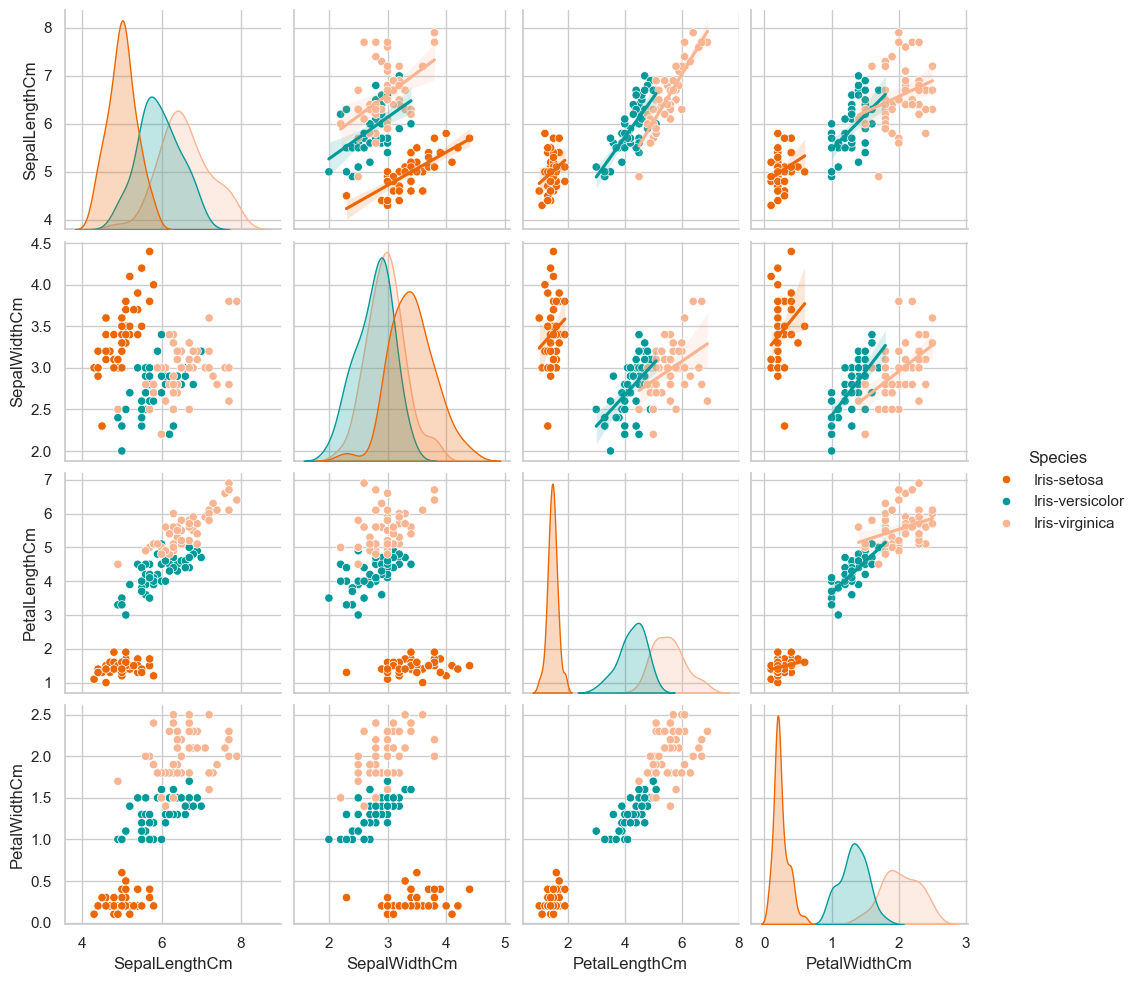

In [9]:
g = sns.pairplot(df.drop(columns='Id'), diag_kind='kde', hue='Species')
g.map_upper(sns.regplot, scatter=False);

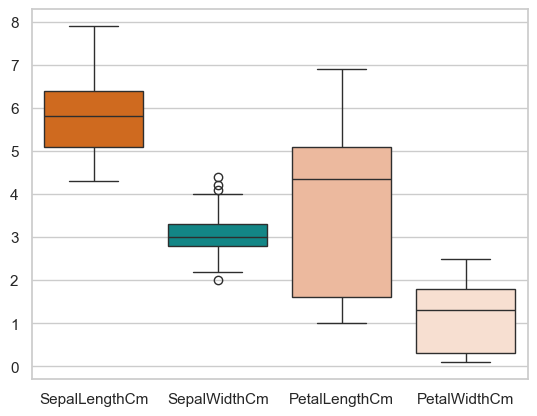

In [16]:
sns.boxplot(data=df.drop(columns='Id'));

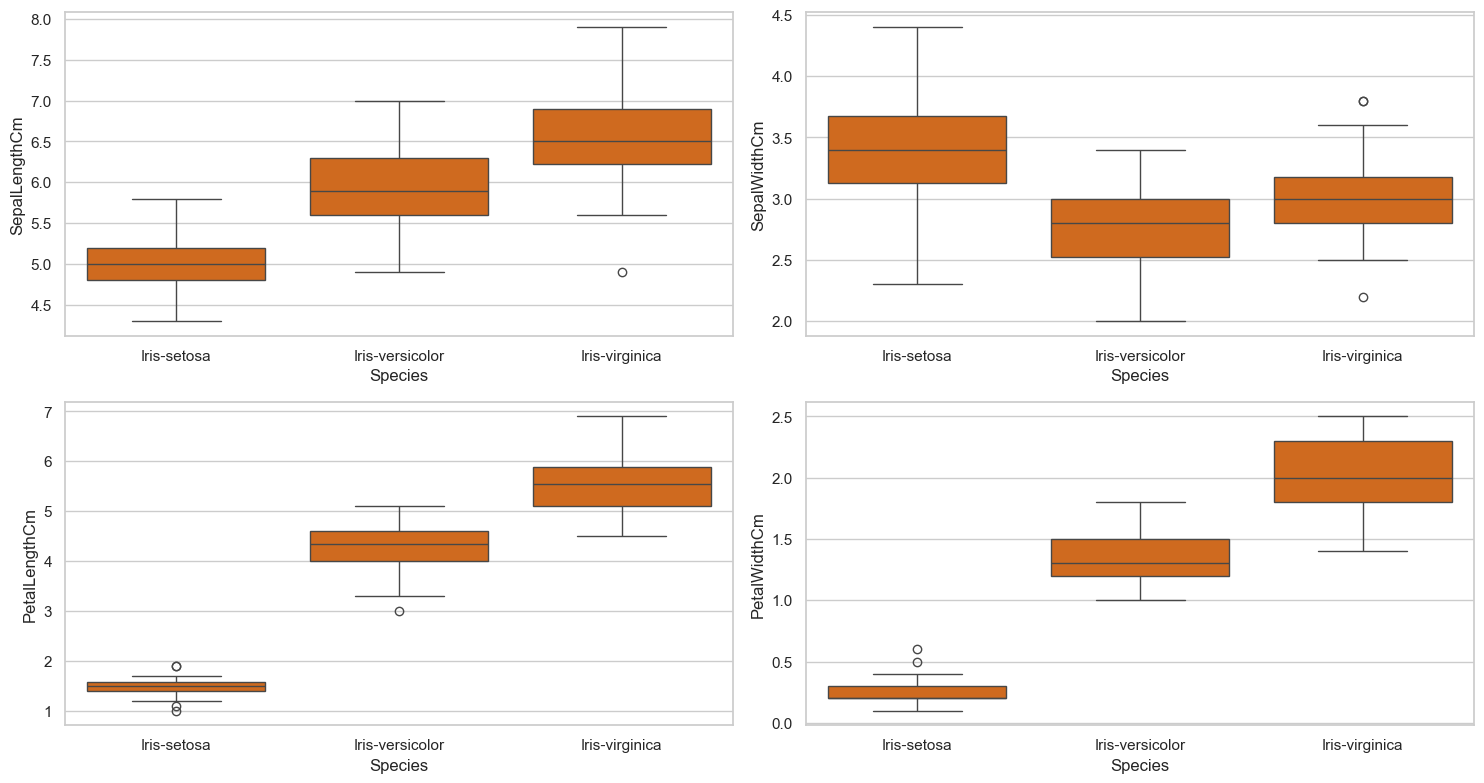

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
sns.boxplot(x='Species', y='SepalLengthCm', data=df, ax=ax[0, 0]);
sns.boxplot(x='Species', y='SepalWidthCm', data=df, ax=ax[0, 1]);
sns.boxplot(x='Species', y='PetalLengthCm', data=df, ax=ax[1, 0]);
sns.boxplot(x='Species', y='PetalWidthCm', data=df, ax=ax[1, 1]);
plt.tight_layout()
plt.show()

In [26]:
matrix = cramers_v_matrix(df.drop(columns='Id'))
matrix

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,1.000000,NaN,NaN,NaN,NaN
SepalLengthCm,0.598355,1.000000,NaN,NaN,NaN
SepalWidthCm,0.465289,0.279860,1.000000,NaN,NaN
PetalLengthCm,0.843152,0.561241,0.344902,1.000000,NaN
PetalWidthCm,0.813829,0.544968,0.328413,0.731187,1.0


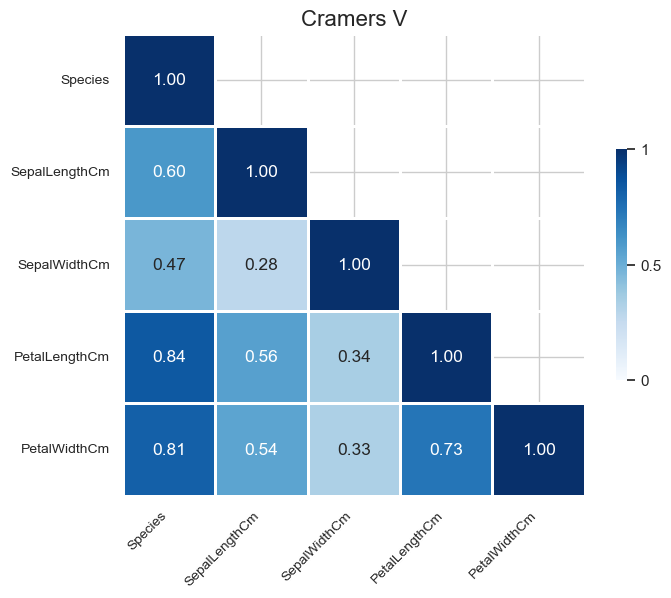

In [27]:
cat_corr_heatmap(matrix)

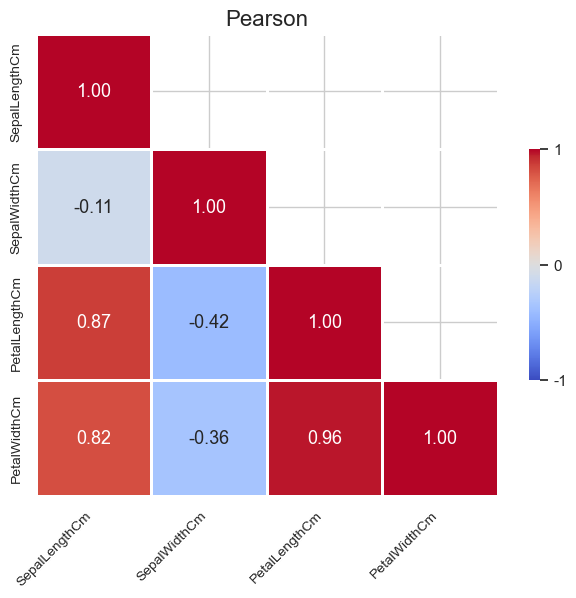

In [30]:
num_corr_heatmap(df.drop(columns='Id').corr(numeric_only=True))

Ich würde `SepalLengthCm` und `PetalLengthCm` benutzen, `PetalWidthCm` hat auch gute Korrelation mit `Species` aber es hat auch gleichzeitig starke Korrelation mit `PetalLengthCm`, so bin ich mir nicht sicher ob diese Variable neue Information in dem Modell bringt (Multikollinearität).